# THE NORTH FACE - ECOMMERCE ANALYSIS
## PART 1: GROUPING PRODUCTS WITH SIMILAR DESCRIPTIONS

In [2]:
!pip install wordcloud -q

In [3]:
# Importing useful libraries
import pandas as pd
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [14]:
# Importing the TF-ID Matrix
dataset = pd.read_csv('TF-IDF_Matrix.csv', index_col = 0)
dataset.head()

,11c,12d,3d,abandon,ability,able,abrasion,abrasive,abroad,absolute,...,yoke,yosemite,young,yvon,zinger,zip,zipper,zippered,zipping,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.142494,0.256837,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.141109,0.000000,0.0,0.0


In [15]:
# Dropping the first 2 columns that won't help the analysis
dataset.drop(["11c", "12d", "3d"], axis = 1, inplace = True)
dataset.head()

,abandon,ability,able,abrasion,abrasive,abroad,absolute,absorb,absorption,abstract,...,yoke,yosemite,young,yvon,zinger,zip,zipper,zippered,zipping,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.142494,0.256837,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.141109,0.000000,0.0,0.0


## CLUSTERING

In [141]:
# Instanciate DBSCAN 
db = DBSCAN(eps=0.6, min_samples=7, metric="cosine")
# Fit on data 
db.fit(dataset)


DBSCAN(eps=0.6, metric='cosine', min_samples=7)

In [142]:
# Predict clusters
cluster_number = db.fit_predict(dataset)

In [192]:
# Adding a column with the cluster number in the original dataframe
original_df = pd.read_csv('sample-data-ecommerce.csv')
original_df["cluster"] = cluster_number

# Verifying how many clusters we have and if we don't have too many outliers 
original_df["cluster"].value_counts()

 0     289
 4      47
 5      32
 3      28
 9      17
 7      16
 10     15
 1      12
 2       9
 6       8
 12      7
 11      7
 8       7
-1       6
Name: cluster, dtype: int64

In [196]:
# Saving the cluster information in a new csv
original_df.to_csv('Desc_clusters.csv', index = False)

## VISUALIZATION

In [148]:
# importing the dataset with cleaned descriptions
desc_df = pd.read_csv('Cleaned_descriptions.csv')

In [149]:
# Adding cluster information in the dataset with cleaned descriptions
desc_df["cluster"] = cluster_number
desc_df.head()

,clean_token,cluster
0,active classic boxer reason boxer cult fav...,0
1,active sport boxer brief skin glory requir...,0
2,active sport brief superbreathable fly bri...,0
3,alpine guide pant skin climb ice swi...,0
4,alpine wind jkt high ridge steep ice al...,-1


In [189]:
# Saving cluster information in a new csv
desc_df.to_csv('Desc_clusters.csv', index = False)

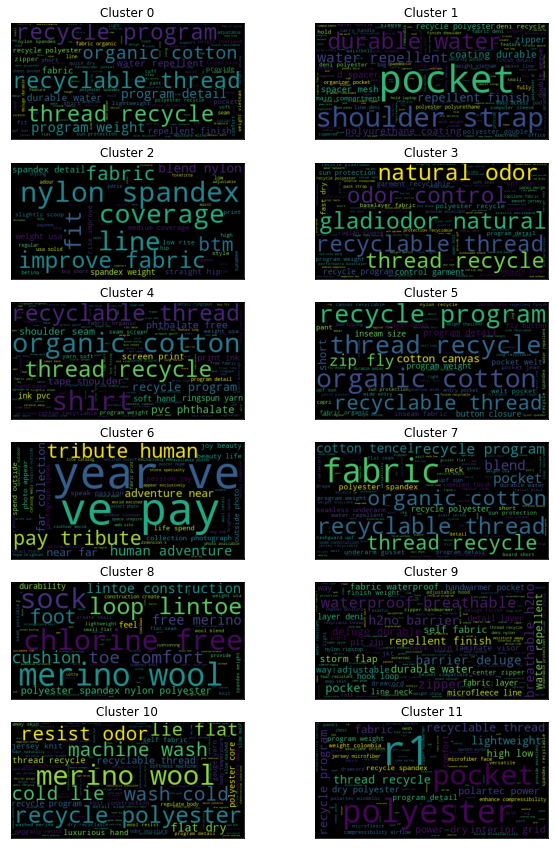

In [187]:
# Visualizing most important word of each cluster in a word cloud.
wd = WordCloud()

fig, ax = plt.subplots(6, 2, figsize=(10, 15))
for i, axi in enumerate(ax.flat):
    
    corpus = ""
    mask_cluster = desc_df["cluster"] == i
    
    for element in desc_df.loc[mask_cluster, "clean_token"].values:
        corpus += element + " "

    cloud = wd.generate(corpus)
    
    axi.set_title("Cluster {}".format(i))
    axi.imshow(cloud)
    axi.set(xticks=[], yticks=[])   
